
# DV Project

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import math as mt
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
data=pd.read_excel("C:\\Users\\mrpal\\OneDrive\\Desktop\\DV Project\\both_all.xlsx")
data.head()

,P_type,Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Fixation Count,Fixation Frequency [count/s],Fixation Duration Total [ms],...,Saccade Velocity Maximum [°/s],Saccade Velocity Minimum [°/s],Saccade Latency Average [ms],Blink Count,Blink Frequency [count/s],Blink Duration Total [ms],Blink Duration Average [ms],Blink Duration Maximum [ms],Blink Duration Minimum [ms],Scanpath Length [px]
0,Non_Expert,Trial001,01_dr.JPG,0,4989.4,NE1,Coral,10,2.0,4299.9,...,0.0,0.0,470.9,1,0.2,133.6,133.6,133.6,133.6,1002
1,Non_Expert,Trial001,01_dr.JPG,0,4986.0,NE2,CornflowerBlue,14,2.8,4332.0,...,0.0,0.0,330.5,0,0.0,0.0,0.0,0.0,0.0,2599
2,Non_Expert,Trial001,01_dr.JPG,0,5004.2,NE3,Crimson,13,2.6,4455.0,...,0.0,0.0,363.8,0,0.0,0.0,0.0,0.0,0.0,2129
3,Non_Expert,Trial001,01_dr.JPG,0,4979.9,NE4,Cyan,9,1.8,4454.6,...,0.0,0.0,631.6,1,0.2,100.0,100.0,100.0,100.0,1368
4,Non_Expert,Trial001,01_dr.JPG,0,5000.4,NE5,DarkBlue,10,2.0,4535.6,...,0.0,0.0,521.1,0,0.0,0.0,0.0,0.0,0.0,1692


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   P_type                            1654 non-null   object 
 1   Trial                             1654 non-null   object 
 2   Stimulus                          1654 non-null   object 
 3   Export Start Trial Time [ms]      1654 non-null   int64  
 4   Export End Trial Time [ms]        1654 non-null   float64
 5   Participant                       1654 non-null   object 
 6   Color                             1654 non-null   object 
 7   Fixation Count                    1654 non-null   int64  
 8   Fixation Frequency [count/s]      1654 non-null   float64
 9   Fixation Duration Total [ms]      1654 non-null   float64
 10  Fixation Duration Average [ms]    1654 non-null   float64
 11  Fixation Duration Maximum [ms]    1654 non-null   float64
 12  Fixati

In [5]:
data.describe()

,Export Start Trial Time [ms],Export End Trial Time [ms],Fixation Count,Fixation Frequency [count/s],Fixation Duration Total [ms],Fixation Duration Average [ms],Fixation Duration Maximum [ms],Fixation Duration Minimum [ms],Fixation Dispersion Total [px],Fixation Dispersion Average [px],...,Saccade Velocity Maximum [°/s],Saccade Velocity Minimum [°/s],Saccade Latency Average [ms],Blink Count,Blink Frequency [count/s],Blink Duration Total [ms],Blink Duration Average [ms],Blink Duration Maximum [ms],Blink Duration Minimum [ms],Scanpath Length [px]
count,1654.0,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,...,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000
mean,0.0,5000.816264,9.591294,1.918259,4089.239903,704.348489,1469.585792,292.842019,1129.375937,115.379504,...,115.736699,28.293108,507.701270,0.865175,0.173035,164.567231,69.167654,84.311911,60.515901,1061.594317
std,0.0,7.024150,4.702506,0.940501,995.318269,867.693301,1186.590382,797.422317,991.555019,68.568544,...,192.400356,68.186868,482.972653,2.194551,0.438910,461.776311,182.194681,216.152526,171.607859,859.790339
min,0.0,4910.000000,1.000000,0.200000,82.900000,82.900000,82.900000,80.000000,22.300000,22.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4999.400000,6.000000,1.200000,3907.300000,283.575000,666.300000,98.250000,478.675000,60.225000,...,0.000000,0.000000,261.675000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,408.250000
50%,0.0,5000.100000,10.000000,2.000000,4433.850000,412.950000,1033.250000,116.700000,772.700000,89.650000,...,0.000000,0.000000,383.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,820.500000
75%,0.0,5000.900000,13.000000,2.600000,4719.425000,741.250000,1866.975000,166.600000,1505.075000,164.850000,...,159.000000,37.075000,585.675000,1.000000,0.200000,166.600000,123.675000,133.300000,99.225000,1565.250000
max,0.0,5052.300000,23.000000,4.600000,4999.600000,4999.600000,4999.600000,4999.600000,5517.400000,334.200000,...,1211.200000,859.000000,4415.100000,21.000000,4.200000,4433.000000,4433.000000,4433.000000,4433.000000,4927.000000


In [6]:
data.columns

Index(['P_type', 'Trial', 'Stimulus', 'Export Start Trial Time [ms]',
       'Export End Trial Time [ms]', 'Participant', 'Color', 'Fixation Count',
       'Fixation Frequency [count/s]', 'Fixation Duration Total [ms]',
       'Fixation Duration Average [ms]', 'Fixation Duration Maximum [ms]',
       'Fixation Duration Minimum [ms]', 'Fixation Dispersion Total [px]',
       'Fixation Dispersion Average [px]', 'Fixation Dispersion Maximum [px]',
       'Fixation Dispersion Minimum [px]', 'Saccade Count',
       'Saccade Frequency [count/s]', 'Saccade Duration Total [ms]',
       'Saccade Duration Average [ms]', 'Saccade Duration Maximum [ms]',
       'Saccade Duration Minimum [ms]', 'Saccade Amplitude Total [°]',
       'Saccade Amplitude Average [°]', 'Saccade Amplitude Maximum [°]',
       'Saccade Amplitude Minimum [°]', 'Saccade Velocity Total [°/s]',
       'Saccade Velocity Average [°/s]', 'Saccade Velocity Maximum [°/s]',
       'Saccade Velocity Minimum [°/s]', 'Saccade Latency 

#### A1. Please study about the train_test_split() functionality available from above website. Use the functionality to perform a train test split with 80:20 ratio (80% available data is taken as training set).

In [7]:
X=data[[ 'Fixation Count', 'Fixation Duration Total [ms]',
       'Fixation Duration Average [ms]', 'Fixation Duration Maximum [ms]',
       'Fixation Duration Minimum [ms]', 'Fixation Dispersion Total [px]',
       'Fixation Dispersion Average [px]', 'Fixation Dispersion Maximum [px]',
       'Fixation Dispersion Minimum [px]', 'Scanpath Length [px]']] #.values

X.head() # X[0:2]

,Fixation Count,Fixation Duration Total [ms],Fixation Duration Average [ms],Fixation Duration Maximum [ms],Fixation Duration Minimum [ms],Fixation Dispersion Total [px],Fixation Dispersion Average [px],Fixation Dispersion Maximum [px],Fixation Dispersion Minimum [px],Scanpath Length [px]
0,10,4299.9,430.0,1333.2,133.3,426.6,42.7,79.7,14.5,1002
1,14,4332.0,309.4,599.9,100.1,549.9,39.3,79.8,5.6,2599
2,13,4455.0,342.7,799.6,88.9,482.7,37.1,73.4,9.9,2129
3,9,4454.6,495.0,1233.4,99.7,469.9,52.2,107.5,11.3,1368
4,10,4535.6,453.6,1533.2,133.3,416.5,41.6,115.2,5.1,1692


In [8]:
#Standardization of data with mean 0 and Var 1 to every features
#X= preprocessing.StandardScaler().fit_transform(X)
#X[0:5]

In [9]:
is_expert=[]
for i in range(len(data["P_type"])):
    if data["P_type"][i]=="Expert":
        is_expert.append(1)
    else:
        is_expert.append(0)
        

In [10]:
data["is_expert"]=is_expert


In [11]:
data.head()

,P_type,Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Fixation Count,Fixation Frequency [count/s],Fixation Duration Total [ms],...,Saccade Velocity Minimum [°/s],Saccade Latency Average [ms],Blink Count,Blink Frequency [count/s],Blink Duration Total [ms],Blink Duration Average [ms],Blink Duration Maximum [ms],Blink Duration Minimum [ms],Scanpath Length [px],is_expert
0,Non_Expert,Trial001,01_dr.JPG,0,4989.4,NE1,Coral,10,2.0,4299.9,...,0.0,470.9,1,0.2,133.6,133.6,133.6,133.6,1002,0
1,Non_Expert,Trial001,01_dr.JPG,0,4986.0,NE2,CornflowerBlue,14,2.8,4332.0,...,0.0,330.5,0,0.0,0.0,0.0,0.0,0.0,2599,0
2,Non_Expert,Trial001,01_dr.JPG,0,5004.2,NE3,Crimson,13,2.6,4455.0,...,0.0,363.8,0,0.0,0.0,0.0,0.0,0.0,2129,0
3,Non_Expert,Trial001,01_dr.JPG,0,4979.9,NE4,Cyan,9,1.8,4454.6,...,0.0,631.6,1,0.2,100.0,100.0,100.0,100.0,1368,0
4,Non_Expert,Trial001,01_dr.JPG,0,5000.4,NE5,DarkBlue,10,2.0,4535.6,...,0.0,521.1,0,0.0,0.0,0.0,0.0,0.0,1692,0


In [12]:
y=data['is_expert'] #.values
#y[0:5]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1323, 10) (1323,)
Test set: (331, 10) (331,)


In [15]:
print("x data",X.shape)
print(X_train.shape)
print(X_test.shape)
y_train.value_counts()

x data (1654, 10)
(1323, 10)
(331, 10)


0    765
1    558
Name: is_expert, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train= oversample.fit_resample(X_train, y_train)

In [17]:
print(X_train.shape)
print(X_test.shape)
y_train.value_counts()

(1530, 10)
(331, 10)


0    765
1    765
Name: is_expert, dtype: int64

# SVM Model 

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import metrics

In [147]:
model_100 = svm.SVC(kernel='rbf')

scores = cross_val_score(model_100, X_train, y_train, cv=5)
scores

array([0.97727273, 0.95454545, 0.99025974, 0.98371336, 0.9771987 ])

In [148]:
model_100.fit(X_train, y_train)

SVC()

In [149]:
### 1. Get and print a baseline accuracy score.
y_pred = model_100.predict(X_test)
accuracy = model_100.score(X_test, y_test)
print("Test Accuracy %f" % accuracy)
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

y_pred_train = model_100.predict(X_train)
accuracy = model_100.score(X_train, y_train)
print("Train Accuracy %f" % accuracy)
metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train)

Test Accuracy 0.975831
Train Accuracy 0.977893


0.9778933680104032

In [150]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       191
           1       1.00      0.94      0.97       140

    accuracy                           0.98       331
   macro avg       0.98      0.97      0.98       331
weighted avg       0.98      0.98      0.98       331



Text(0.5, 1.0, 'Accuracy Score,: 0.9758308157099698')

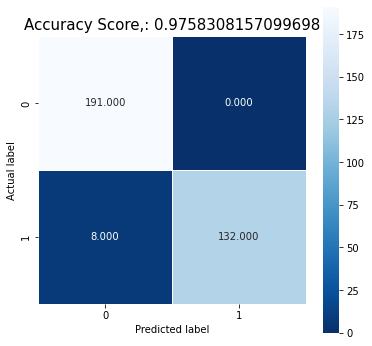

In [151]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score,: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(title,size=15)

# SVM + PCA Model 

In [152]:
from sklearn.decomposition import PCA 
pca = PCA(0.95) # Preserve 90% of the variance
X_train_transformed = pca.fit_transform(X_train) 
X_test_transformed = pca.transform(X_test) 
print(X_train_transformed.shape)
print(X_test_transformed.shape)
print(X_train.shape)

(1538, 4)
(331, 4)
(1538, 10)


In [153]:
model_pca= svm.SVC()
model_pca.fit(X_train_transformed, y_train)


SVC()

In [154]:
### 1. Get and print a baseline accuracy score.
y_pred_pca = model_pca.predict(X_test_transformed)
accuracy = model_pca.score(X_test_transformed, y_test)
print(" Test Accuracy %f" % accuracy)
metrics.accuracy_score(y_test,y_pred_pca)

 Test Accuracy 0.969789


0.9697885196374623

In [155]:
print(metrics.classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       191
           1       1.00      0.93      0.96       140

    accuracy                           0.97       331
   macro avg       0.98      0.96      0.97       331
weighted avg       0.97      0.97      0.97       331



Text(0.5, 1.0, 'Accuracy Score, 0.9697885196374623')

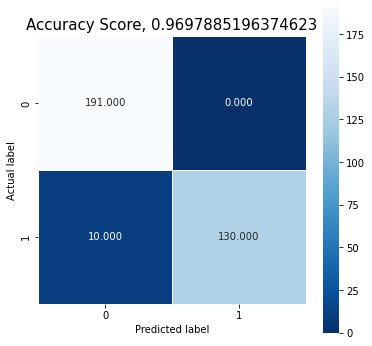

In [156]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_pca)

plt.figure(figsize=(6,6))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score, {0}'.format(accuracy_score(y_test, y_pred_pca))
plt.title(title,size=15)

# Decision Tree Model

In [157]:
# Initialize Decision Trees model, No hyperparameter Tuning
decision_trees = DecisionTreeClassifier()

# Use training data to fit Decision Trees model
ds=decision_trees.fit(X_train, y_train)

In [158]:
predictions_set = decision_trees.predict(X_test)
y_pred=predictions_set

In [159]:
accuracy = ds.score(X_test, y_test)
print("Accuracy %f" % accuracy)
accuracy_score(y_true=y_test, y_pred=y_pred)

Accuracy 0.966767


0.9667673716012085

Text(0.5, 1.0, 'Accuracy Score: 0.9667673716012085')

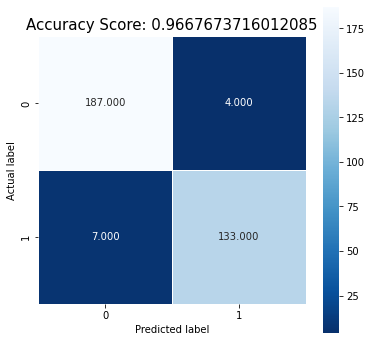

In [160]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(title,size=15)

In [161]:
print("\nClassification Report\n", classification_report(y_test, predictions_set))


Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       191
           1       0.97      0.95      0.96       140

    accuracy                           0.97       331
   macro avg       0.97      0.96      0.97       331
weighted avg       0.97      0.97      0.97       331



[Text(0.41627358490566035, 0.95, 'X[7] <= 160.75\ngini = 0.5\nsamples = 1538\nvalue = [769, 769]'),
 Text(0.16981132075471697, 0.85, 'X[5] <= 1339.2\ngini = 0.035\nsamples = 725\nvalue = [712, 13]'),
 Text(0.1320754716981132, 0.75, 'X[2] <= 171.65\ngini = 0.027\nsamples = 722\nvalue = [712, 10]'),
 Text(0.09433962264150944, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16981132075471697, 0.65, 'X[4] <= 84.4\ngini = 0.022\nsamples = 720\nvalue = [712, 8]'),
 Text(0.1320754716981132, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.20754716981132076, 0.55, 'X[1] <= 3625.15\ngini = 0.019\nsamples = 719\nvalue = [712, 7]'),
 Text(0.07547169811320754, 0.45, 'X[7] <= 140.65\ngini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.03773584905660377, 0.35, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.11320754716981132, 0.35, 'X[4] <= 100.05\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.07547169811320754, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Tex

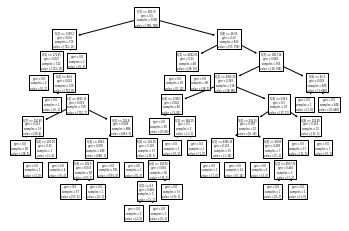

In [163]:
from sklearn.tree import plot_tree
plot_tree(decision_trees)

# Decision Tree + PCA Model

In [164]:
from sklearn.decomposition import PCA 
pca = PCA(0.95)
 
print(X_train_transformed.shape)
print(X_test_transformed.shape)
print(X_train.shape)

(1538, 4)
(331, 4)
(1538, 10)


In [165]:
# Initialize Decision Trees model for PCA instance
decision_trees_pca = DecisionTreeClassifier()

# Use training data to fit Decision Trees model with transformed X_train
decision_trees_pca.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [166]:
# make prediction on entire test data
predictions_set_pca = decision_trees_pca.predict(X_test_transformed)
print("Accuracy using PCA:", accuracy_score(y_test, predictions_set_pca))

Accuracy using PCA: 0.9788519637462235



PCA Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       191
           1       0.97      0.98      0.98       140

    accuracy                           0.98       331
   macro avg       0.98      0.98      0.98       331
weighted avg       0.98      0.98      0.98       331



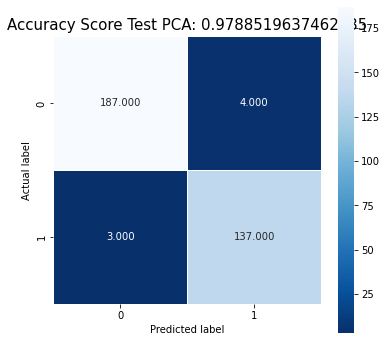

In [167]:
cm = confusion_matrix(y_test, predictions_set_pca)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test PCA: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(title,size=15)
print("\nPCA Classification Report\n", classification_report(y_test, predictions_set_pca))

# KNN CLassifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier


Classification Report
 1               precision    recall  f1-score   support

           0       0.96      0.97      0.97       192
           1       0.96      0.95      0.96       139

    accuracy                           0.96       331
   macro avg       0.96      0.96      0.96       331
weighted avg       0.96      0.96      0.96       331


Classification Report
 2               precision    recall  f1-score   support

           0       0.98      0.96      0.97       197
           1       0.95      0.97      0.96       134

    accuracy                           0.97       331
   macro avg       0.96      0.97      0.97       331
weighted avg       0.97      0.97      0.97       331


Classification Report
 3               precision    recall  f1-score   support

           0       0.95      0.97      0.96       191
           1       0.96      0.94      0.95       140

    accuracy                           0.95       331
   macro avg       0.95      0.95      0.95       

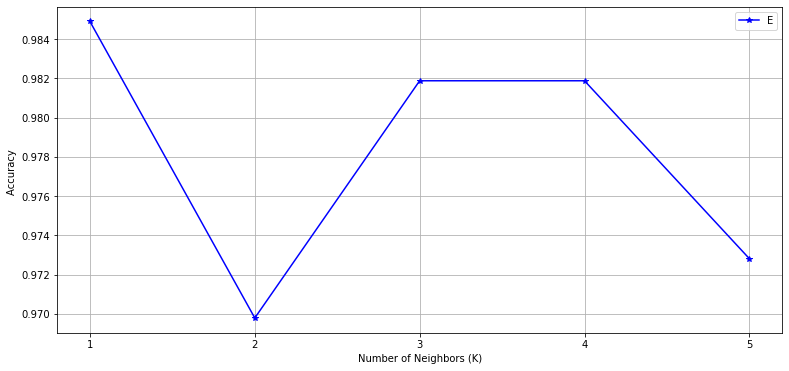

In [169]:
k=[1,2,3,4,5]
acc1=[]
for i in k:
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    pred_i=knn_i.predict(X_test)
    acc_i=knn_i.score(X_test,y_test)
    acc1.append(acc_i)
    print("\nClassification Report\n",i, classification_report(pred_i , y_pred))
    
plt.figure(figsize=(13,6))    
plt.plot(k,acc1,color='b',marker='*')
plt.legend('Euclidian')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
#plt.tight_layout()
plt.grid(True)
plt.xticks(k,k)
plt.show()

In [170]:
# Initialize KNN model
knn = KNeighborsClassifier()
# Use training data to fit KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [171]:
# make prediction on entire test data
predictions_set1 = knn.predict(X_test)

In [172]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test, predictions_set1))

KNN Accuracy: 0.973


Text(0.5, 1.0, 'Accuracy Score: 0.972809667673716')

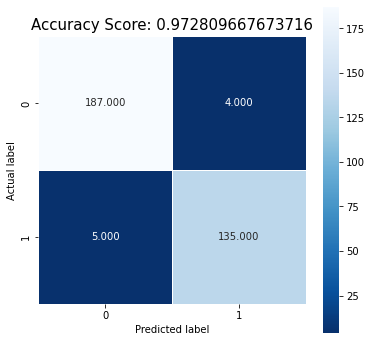

In [173]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set1)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set1))
plt.title(all_sample_title,size=15)

In [174]:
print('KNN Precision: %.3f' % precision_score(y_test, predictions_set1, average='micro'))
print('KNN Recall: %.3f' % recall_score(y_test, predictions_set1, average='micro'))
print('KNN F1 Score: %.3f' % f1_score(y_test, predictions_set1, average='micro'))
print("\nClassification Report\n", classification_report(y_test, predictions_set1))

KNN Precision: 0.973
KNN Recall: 0.973
KNN F1 Score: 0.973

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       191
           1       0.97      0.96      0.97       140

    accuracy                           0.97       331
   macro avg       0.97      0.97      0.97       331
weighted avg       0.97      0.97      0.97       331



# KNN Classfier + PCA Model

In [175]:
# Initialize KNN model for PCA instance
knn_pca = KNeighborsClassifier()
# Use training data to fit KNN model with transformed X_train
knn_pca.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [176]:
# make prediction on entire test data
predictions_set_pca = knn_pca.predict(X_test_transformed)
print("Accuracy Train PCA:", accuracy_score(y_test, predictions_set_pca))

Accuracy Train PCA: 0.9848942598187311



 PCA Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       191
           1       0.99      0.98      0.98       140

    accuracy                           0.98       331
   macro avg       0.98      0.98      0.98       331
weighted avg       0.98      0.98      0.98       331



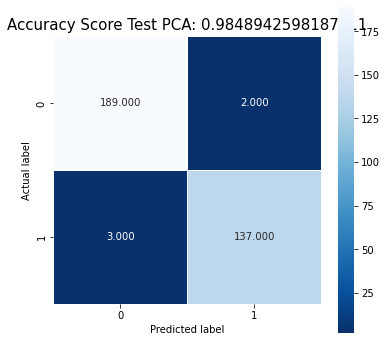

In [177]:
# Calculate Confusion Matrix for PCA
cm = confusion_matrix(y_test, predictions_set_pca)
plt.figure(figsize=(6,6))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test PCA: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(title,size=15)
print("\n PCA Classification Report\n", classification_report(y_test, predictions_set_pca))

# NB Classifier

In [178]:
from sklearn.naive_bayes import GaussianNB

In [179]:
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)

GaussianNB()

In [180]:
gnb_y_pred = gaussianNB_model.predict(X_test)
accuracy = accuracy_score(y_test, gnb_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

Accuracy: 0.966767




PCA Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       191
           1       0.98      0.94      0.96       140

    accuracy                           0.97       331
   macro avg       0.97      0.96      0.97       331
weighted avg       0.97      0.97      0.97       331



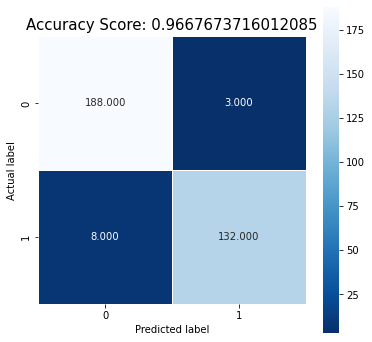

In [181]:
cm = confusion_matrix(y_test, gnb_y_pred)
plt.figure(figsize=(6,6))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, gnb_y_pred))
plt.title(title,size=15)
print("\nPCA Classification Report\n", classification_report(y_test, gnb_y_pred))

# NB Classifier + PCA Model

In [182]:
gaussianNB_model_pca = GaussianNB()

gaussianNB_model_pca.fit(X_train_transformed, y_train)

GaussianNB()

In [183]:
# make prediction on entire test data
gnb_y_pred_pca = gaussianNB_model_pca.predict(X_test_transformed)
print("Accuracy Train PCA:", accuracy_score(y_test, gnb_y_pred_pca))

Accuracy Train PCA: 0.9365558912386707



PCA Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       191
           1       0.99      0.86      0.92       140

    accuracy                           0.94       331
   macro avg       0.95      0.93      0.93       331
weighted avg       0.94      0.94      0.94       331



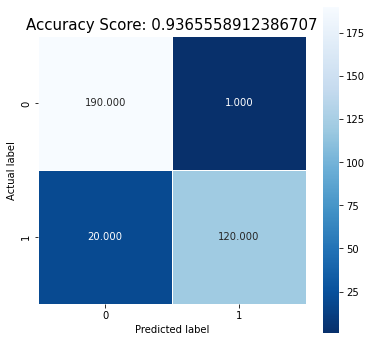

In [184]:
cm = confusion_matrix(y_test, gnb_y_pred_pca)

plt.figure(figsize=(6,6))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, gnb_y_pred_pca))
plt.title(title,size=15)

print("\nPCA Classification Report\n", classification_report(y_test, gnb_y_pred_pca))